In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [20]:
env='Ant-v4'

In [21]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [22]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(1395, 17)


In [23]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(1386, 17)


In [24]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,14-07-2023 22:31:09,200,0,200,0.009941,1,201,False,96.645216,96.645216,96.645216,96.645216,96.645216,COMPER
1,1,2,Ant-v4,14-07-2023 22:36:34,400,0,400,0.019882,1,401,False,282.980117,189.812666,189.812666,189.812666,189.812666,COMPER
2,1,3,Ant-v4,14-07-2023 22:41:56,600,0,599,0.029822,1,601,False,166.355116,181.993483,181.993483,181.993483,181.993483,COMPER
3,1,4,Ant-v4,14-07-2023 22:47:23,800,0,797,0.039763,1,801,False,218.069126,191.012394,191.012394,191.012394,191.012394,COMPER
4,1,5,Ant-v4,14-07-2023 22:52:42,1000,0,996,0.049704,1,1001,True,375.408745,227.891664,227.891664,227.891664,227.891664,COMPER
5,1,6,Ant-v4,14-07-2023 22:58:12,1200,0,1196,0.059645,2,201,False,47.828681,197.881167,197.881167,197.881167,197.881167,COMPER
6,1,7,Ant-v4,14-07-2023 23:03:32,1400,0,1396,0.069586,2,401,False,220.072564,201.051366,201.051366,201.051366,201.051366,COMPER
7,1,8,Ant-v4,14-07-2023 23:09:02,1600,0,1595,0.079526,2,601,False,397.967780,225.665918,225.665918,225.665918,225.665918,COMPER
8,1,9,Ant-v4,14-07-2023 23:14:21,1800,0,1794,0.089467,2,801,False,459.322808,251.627795,251.627795,251.627795,251.627795,COMPER
9,1,10,Ant-v4,14-07-2023 23:19:50,2000,0,1994,0.099408,2,1001,True,599.958227,286.460838,286.460838,286.460838,286.460838,COMPER


In [25]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,14-07-2023 13:23:27,200,201,0,0.009941,1,201,False,95.702389,95.702389,95.702389,95.702389,95.702389,DDPG
1,1,2,Ant-v4,14-07-2023 13:23:46,400,396,0,0.019882,1,401,False,139.240996,117.471692,117.471692,117.471692,117.471692,DDPG
2,1,3,Ant-v4,14-07-2023 13:24:04,600,589,0,0.029822,1,601,False,315.297255,183.413547,183.413547,183.413547,183.413547,DDPG
3,1,4,Ant-v4,14-07-2023 13:24:23,800,786,0,0.039763,1,801,False,492.046914,260.571888,260.571888,260.571888,260.571888,DDPG
4,1,5,Ant-v4,14-07-2023 13:24:42,1000,984,0,0.049704,1,1001,True,655.208081,339.499127,339.499127,339.499127,339.499127,DDPG
5,1,6,Ant-v4,14-07-2023 13:25:01,1200,1184,0,0.059645,2,201,False,88.592577,297.681369,297.681369,297.681369,297.681369,DDPG
6,1,7,Ant-v4,14-07-2023 13:25:20,1400,1381,0,0.069586,2,401,False,176.456072,280.363469,280.363469,280.363469,280.363469,DDPG
7,1,8,Ant-v4,14-07-2023 13:25:39,1600,1575,0,0.079526,2,601,False,328.209938,286.344278,286.344278,286.344278,286.344278,DDPG
8,1,9,Ant-v4,14-07-2023 13:25:58,1800,1772,0,0.089467,2,801,False,437.280799,303.115002,303.115002,303.115002,303.115002,DDPG
9,1,10,Ant-v4,14-07-2023 13:26:18,2000,1964,0,0.099408,2,1001,True,398.901331,312.693635,312.693635,312.693635,312.693635,DDPG


In [26]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,14-07-2023 22:31:09,200,0,200,0.009941,1,201,False,96.645216,96.645216,96.645216,96.645216,96.645216,COMPER
1,1,2,Ant-v4,14-07-2023 22:36:34,400,0,400,0.019882,1,401,False,282.980117,189.812666,189.812666,189.812666,189.812666,COMPER
2,1,3,Ant-v4,14-07-2023 22:41:56,600,0,599,0.029822,1,601,False,166.355116,181.993483,181.993483,181.993483,181.993483,COMPER
3,1,4,Ant-v4,14-07-2023 22:47:23,800,0,797,0.039763,1,801,False,218.069126,191.012394,191.012394,191.012394,191.012394,COMPER
4,1,5,Ant-v4,14-07-2023 22:52:42,1000,0,996,0.049704,1,1001,True,375.408745,227.891664,227.891664,227.891664,227.891664,COMPER


In [27]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
276,5,277,Ant-v4,14-07-2023 21:29:23,49400,48152,0,0.999,50,401,False,-96.172823,98.207427,93.564977,162.944282,244.569308,DDPG
277,5,278,Ant-v4,14-07-2023 21:29:51,49600,48344,0,0.999,50,601,False,28.138188,97.955379,90.248107,157.045126,205.753258,DDPG
278,5,279,Ant-v4,14-07-2023 21:30:19,49800,48537,0,0.999,50,801,False,137.107106,98.095708,87.071833,150.986191,163.363527,DDPG
279,5,280,Ant-v4,14-07-2023 21:30:47,50000,48729,0,0.999,50,1001,True,141.688698,98.251397,83.111009,142.028020,109.089424,DDPG
280,5,281,Ant-v4,14-07-2023 21:30:47,50001,48730,0,0.999,51,2,True,-0.915222,97.898491,84.143589,138.612567,102.128253,DDPG


In [28]:
df[["Method","Trial"]].value_counts()

Method  Trial
COMPER  4        305
DDPG    3        291
        4        286
        5        281
COMPER  1        275
        3        275
        2        274
DDPG    2        267
COMPER  5        266
DDPG    1        261
dtype: int64

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

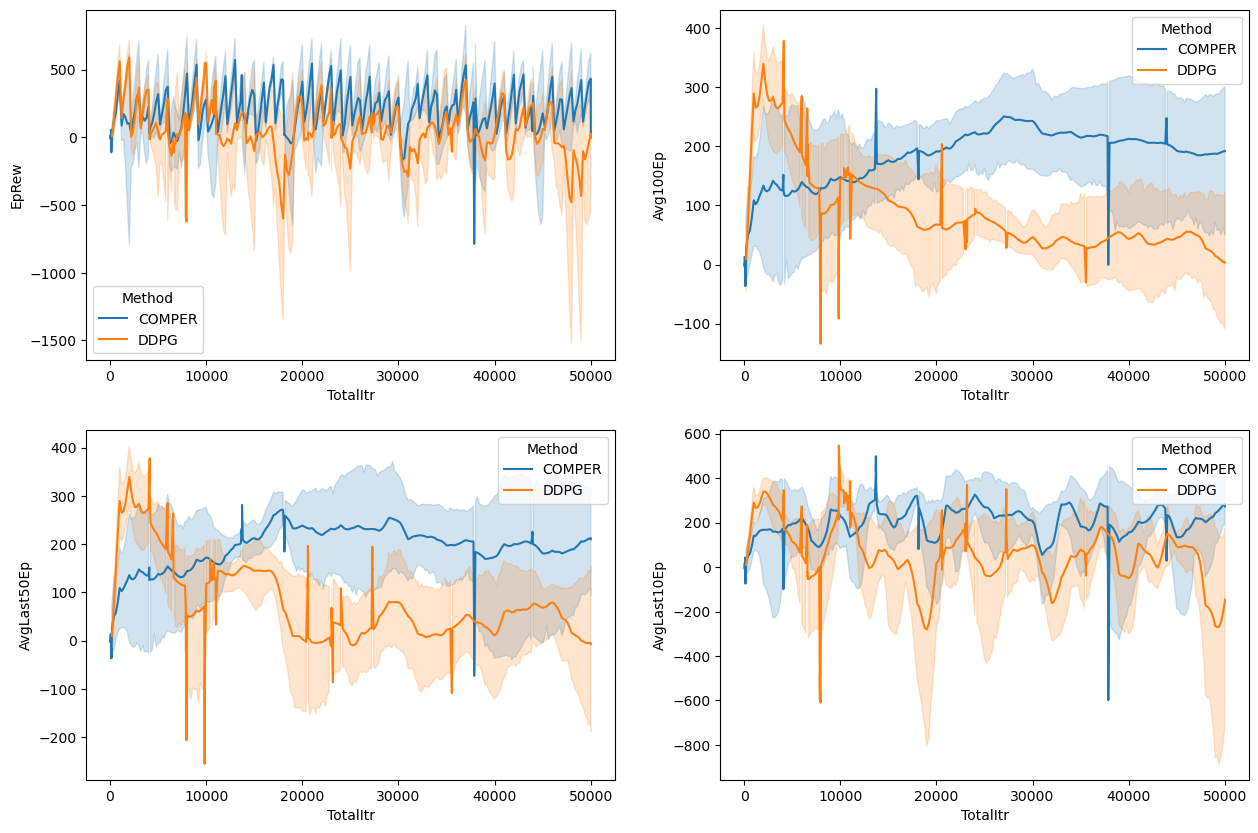

In [29]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])



In [30]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,15-07-2023 00:40:29,Ant-v4,5000,-0.668109,COMPER
1,1,15-07-2023 02:54:45,Ant-v4,10000,4.180469,COMPER
2,1,15-07-2023 05:09:27,Ant-v4,15000,0.837821,COMPER
3,1,15-07-2023 07:24:53,Ant-v4,20000,1.809756,COMPER
4,1,15-07-2023 09:38:25,Ant-v4,25000,4.042800,COMPER


In [31]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.454606
std,1.428571,14507.211437,2.845154
min,1.000000,5000.000000,-6.342969
25%,2.000000,15000.000000,0.427687
50%,3.000000,27500.000000,2.856740
75%,4.000000,40000.000000,4.607822
max,5.000000,50000.000000,7.234362


In [32]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,14-07-2023 13:31:14,Ant-v4,5000,1.128854,DDPG
1,1,14-07-2023 13:39:48,Ant-v4,10000,-5.290122,DDPG
2,1,14-07-2023 13:48:24,Ant-v4,15000,2.039861,DDPG
3,1,14-07-2023 13:57:23,Ant-v4,20000,-0.258820,DDPG
4,1,14-07-2023 14:06:48,Ant-v4,25000,2.895991,DDPG


In [33]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,1.925171
std,1.428571,14507.211437,3.402564
min,1.000000,5000.000000,-8.717143
25%,2.000000,15000.000000,0.630666
50%,3.000000,27500.000000,2.968304
75%,4.000000,40000.000000,4.297463
max,5.000000,50000.000000,6.073229


In [34]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])

<Axes: xlabel='Int', ylabel='EvalAvgRew'>

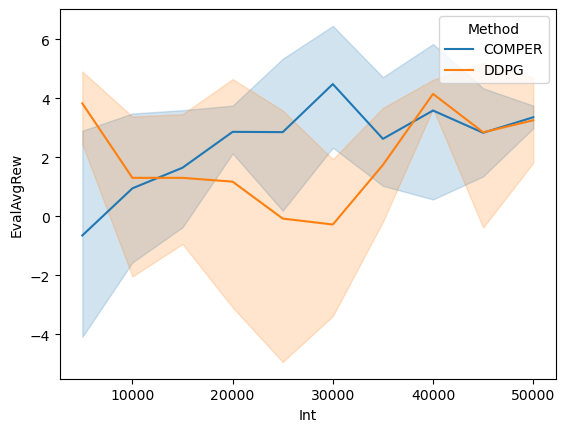

In [35]:
sns.lineplot(data=df_eval, x="Int", y="EvalAvgRew",hue='Method')